# Data Generation

In [128]:
import numpy as np
from media_tools import *
import cv2

sample_media = "C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/"
img = image_tools.read_image(sample_media+"student_guide.jpg")

## Chessboard pattern

In [129]:
# create a chessboard with a given size
def create_chessboard(y=8, x=8):
    chessboard = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            if (i + j) % 2 == 0:
                chessboard[i, j] = 1
            else:
                chessboard[i, j] = 0
    return chessboard

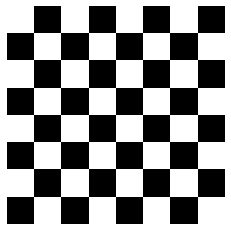

In [130]:
chessboard = create_chessboard()
image_tools.show_image(chessboard, scale_ratio=1)

## Stripes

In [152]:
# fill an array with alternating black and white stripes of a given widths
def create_alternating_stripes(shape, neg_stripe_width, pos_stripe_width, angle=0, vertical=True, interpolation=cv2.INTER_NEAREST):
    # create a 1d array containing the stripe pattern (neg_colour repeated black_stripe_width times, pos_colour repeated
    # white_stripe_width times)
    stripe_pattern = np.concatenate((np.zeros(neg_stripe_width), np.ones(pos_stripe_width)))
        # calculate the dimensions of the container array (must contain enough stripes to fill the rotated shape)
    container_shape = data_tools.rotate_2d_array_around_point(np.zeros(shape), angle, bound=True).shape[:2]

    # fill the container array with the tiled stripe pattern
    if vertical:
        stripes = np.tile(stripe_pattern, container_shape)
    else:
        stripes = np.tile(stripe_pattern, (container_shape[1], container_shape[0])).T

    # rotate the stripes
    stripes = data_tools.rotate_2d_array_around_point(stripes, angle, bound=False, border_type=cv2.BORDER_WRAP,
                                                      interpolation=interpolation)
    # crop the stripes to the original shape around the center
    stripes = stripes[(container_shape[0] - shape[0]) // 2:(container_shape[0] + shape[0]) // 2,
              (container_shape[1] - shape[1]) // 2:(container_shape[1] + shape[1]) // 2]

    return stripes

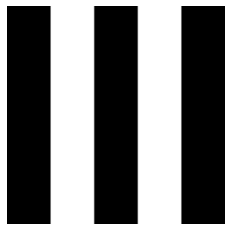

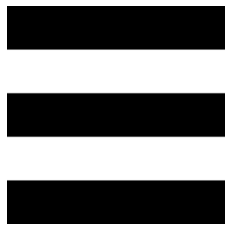

In [153]:
# vertical and horizontal stripes
alternating_stripes_vertical = create_alternating_stripes((100, 100), 20, 20, angle=0, vertical=True)
alternating_stripes_horizontal = create_alternating_stripes((100, 100), 20, 20, angle=0, vertical=False)

image_tools.show_image(alternating_stripes_vertical, "alternating stripes vertical", scale_ratio=1)
image_tools.show_image(alternating_stripes_horizontal, "alternating stripes horizontal", scale_ratio=1)

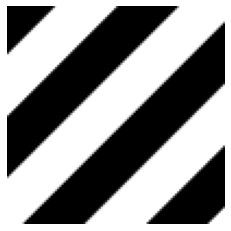

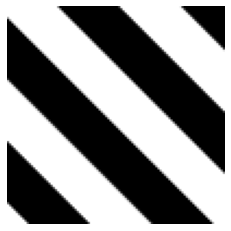

In [154]:
# rotated stripes
rotated_stripes_vertical = create_alternating_stripes((100, 100), 20, 20, angle=45, vertical=True)
rotated_stripes_horizontal = create_alternating_stripes((100, 100), 20, 20, angle=45, vertical=False)

image_tools.show_image(rotated_stripes_vertical, "rotated stripes vertical", scale_ratio=1)
image_tools.show_image(rotated_stripes_horizontal, "rotated stripes horizontal", scale_ratio=1)

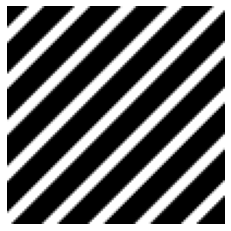

In [155]:
stripes_rbga = create_alternating_stripes((100, 100, 4), 10, 5, 45)
image_tools.show_image(stripes_rbga, scale_ratio=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


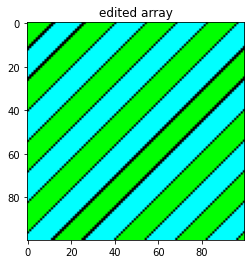

In [159]:
array2edit = np.zeros((100, 100, 3))
edit_mask = create_alternating_stripes(array2edit.shape, neg_stripe_width=10, pos_stripe_width=10, angle=-45, vertical=False)

array2edit[edit_mask == 1] = (0, 255, 0)
array2edit[edit_mask == 0] = (0, 255, 255)
# show the edited array
image_tools.show_image(array2edit, axis=True, title="edited array", scale_ratio=1)

## Gradients

In [161]:
# fill an array with a gradient from black to white at a given angle
def create_gradient(shape, angle=0, vertical=True):
    # generate a container array which will contain the full gradient after rotation
    container_shape = data_tools.rotate_2d_array_around_point(np.zeros(shape), angle, bound=True).shape[:2]
    gradient = np.zeros(container_shape)
    # generate an array with a gradient along the specified axis
    if vertical:
        gradient = np.tile(np.linspace(0, 1, container_shape[1]), (container_shape[0], 1)).T
    else:
        gradient = np.tile(np.linspace(0, 1, container_shape[0]), (container_shape[1], 1))
    # rotate the gradient
    gradient = data_tools.rotate_2d_array_around_point(gradient, angle, bound=False, border_type=cv2.BORDER_REPLICATE,
                                                       interpolation=cv2.INTER_NEAREST)
    # crop the gradient to the original shape around the center
    gradient = gradient[(container_shape[0] - shape[0]) // 2:(container_shape[0] + shape[0]) // 2,
              (container_shape[1] - shape[1]) // 2:(container_shape[1] + shape[1]) // 2]

    return gradient

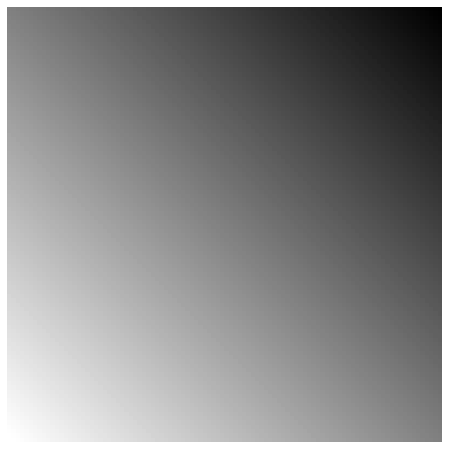

In [163]:
# create a gradient
gradient = create_gradient((100, 100), angle=45, vertical=True)
# show the gradient
image_tools.show_image(gradient, "gradient, vertical, 45 degrees clockwise")